In [1]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import seaborn as sns
df = pd.read_csv('revenue_prediction.csv')

In [2]:
df

,Id,Name,Franchise,Category,City,No_Of_Item,Order_Placed,Revenue
0,101,HungryHowie'sPizza,Yes,Mexican,Bengaluru,55,5.5,5953753
1,102,CharleysPhillySteaks,No,Varied Menu,Gurugram,72,6.8,7223131
2,103,Chuy's,Yes,Chicken,Pune,25,1.9,2555379
3,104,O'Charley's,Yes,Italian/Pizza,Mumbai,18,2.5,2175511
4,105,PolloTropical,Yes,Pizza,Noida,48,4.2,4816715
...,...,...,...,...,...,...,...,...
95,196,Wetzel'sPretzels,No,Italian/Pizza,Bengaluru,19,1.1,1270499
96,197,LaMadeleineCountryFrenchCafe,Yes,Varied Menu,Bengaluru,75,6.3,6412623
97,198,Giordano's,Yes,Varied Menu,Gurugram,77,6.2,6694797
98,199,IslandsFineBurgers&Drinks,Yes,Sports Bar,Pune,25,2.1,2344689


In [3]:
df.shape

(100, 8)

In [4]:
df.Order_Placed.value_counts()

1.9     6
3.6     6
3.1     6
3.3     4
2.1     4
3.5     3
3.8     3
4.0     3
5.3     3
1.6     3
1.7     2
6.8     2
2.8     2
2.6     2
3.9     2
5.4     2
2.4     2
2.9     2
4.8     2
4.3     2
5.0     2
5.1     2
4.2     2
4.4     2
1.5     1
3.0     1
5.5     1
13.0    1
6.1     1
4.5     1
5.7     1
7.2     1
5.8     1
6.5     1
1.1     1
6.3     1
3.4     1
2.2     1
8.5     1
5.2     1
2.5     1
4.9     1
4.7     1
1.8     1
10.8    1
8.1     1
1.0     1
7.1     1
8.8     1
4.6     1
3.7     1
6.7     1
4.1     1
7.7     1
6.2     1
Name: Order_Placed, dtype: int64

In [5]:
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 100 entries, 0 to 99
Data columns (total 8 columns):
 #   Column        Non-Null Count  Dtype  
---  ------        --------------  -----  
 0   Id            100 non-null    int64  
 1   Name          100 non-null    object 
 2   Franchise     100 non-null    object 
 3   Category      100 non-null    object 
 4   City          100 non-null    object 
 5   No_Of_Item    100 non-null    int64  
 6   Order_Placed  100 non-null    float64
 7   Revenue       100 non-null    int64  
dtypes: float64(1), int64(3), object(4)
memory usage: 6.4+ KB


In [6]:
df.isnull().sum()

Id              0
Name            0
Franchise       0
Category        0
City            0
No_Of_Item      0
Order_Placed    0
Revenue         0
dtype: int64

In [7]:
df.Id.nunique()

100

In [8]:
col = list(df.columns)

In [9]:
col

['Id',
 'Name',
 'Franchise',
 'Category',
 'City',
 'No_Of_Item',
 'Order_Placed',
 'Revenue']

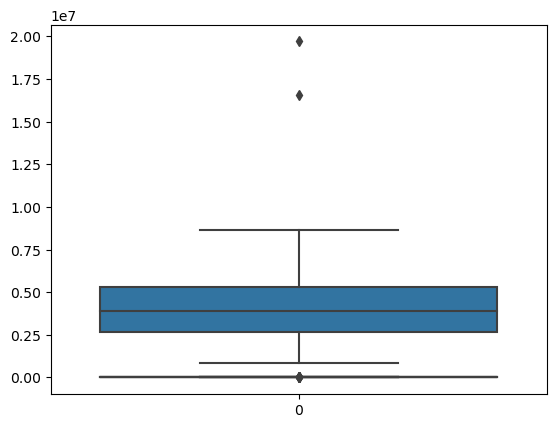

In [10]:
for i in col:
    if df[i].dtype!='object':
        sns.boxplot(df[i])
plt.show()     #do not treat outlier because data is less

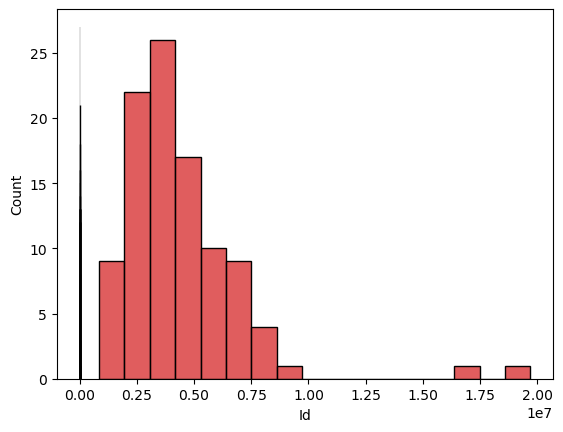

In [11]:
for i in col:
    if df[i].dtype!='object':
        sns.histplot(df[i])
plt.show()        

In [12]:
df = df.drop(columns=['Name','Franchise','Category','City'], axis=1)

In [13]:
df

,Id,No_Of_Item,Order_Placed,Revenue
0,101,55,5.5,5953753
1,102,72,6.8,7223131
2,103,25,1.9,2555379
3,104,18,2.5,2175511
4,105,48,4.2,4816715
...,...,...,...,...
95,196,19,1.1,1270499
96,197,75,6.3,6412623
97,198,77,6.2,6694797
98,199,25,2.1,2344689


In [51]:
X = df.iloc[:,:-1]
Y = df["Revenue"]

In [52]:
X

,Id,No_Of_Item,Order_Placed
0,101,55,5.5
1,102,72,6.8
2,103,25,1.9
3,104,18,2.5
4,105,48,4.2
...,...,...,...
95,196,19,1.1
96,197,75,6.3
97,198,77,6.2
98,199,25,2.1


In [53]:
Y

0     5953753
1     7223131
2     2555379
3     2175511
4     4816715
       ...   
95    1270499
96    6412623
97    6694797
98    2344689
99    4567678
Name: Revenue, Length: 100, dtype: int64

In [54]:
from sklearn.model_selection import train_test_split

In [55]:
X_train,X_test,Y_train,Y_test= train_test_split(X,Y, test_size=.3, random_state=0)

In [56]:
X_train

,Id,No_Of_Item,Order_Placed
60,161,38,3.0
80,181,42,3.5
90,191,40,3.3
68,169,44,3.6
51,152,38,3.1
...,...,...,...
96,197,75,6.3
67,168,40,3.8
64,165,32,2.4
47,148,85,7.7


In [57]:
X_test

,Id,No_Of_Item,Order_Placed
26,127,28,2.1
86,187,40,3.1
2,103,25,1.9
55,156,79,6.8
75,176,126,13.0
93,194,50,3.3
16,117,123,10.8
73,174,39,3.1
54,155,55,4.5
95,196,19,1.1


In [58]:
Y_train

60    3164972
80    3727364
90    3426169
68    3836721
51    3273041
       ...   
96    6412623
67    4052733
64    2551252
47    7865428
44    4264176
Name: Revenue, Length: 70, dtype: int64

In [59]:
Y_test

26     2967425
86     3351383
2      2555379
55     6941173
75    16549064
93     3410878
16    19696939
73     3347767
54     4651866
95     1270499
53     5595267
92     6782425
78     3871344
13     5107746
7      6491607
30     2408199
22     4956086
24     7904084
33     2371202
8      5152497
43     2732645
62     5286212
3      2175511
71     4136425
45     3752885
48     7201784
6      5966635
99     4567678
82     3807496
76     4590423
Name: Revenue, dtype: int64

In [60]:
from sklearn.linear_model import LinearRegression

In [63]:
reg = LinearRegression()

In [64]:
reg.fit(X_train,Y_train)

LinearRegression()

In [65]:
pred = reg.predict(X_test)

In [66]:
pred

array([ 2155272.22829121,  3321804.43331086,  1896022.27862321,
        6972297.83752872, 13604237.72956729,  3415777.50802705,
       10872334.40835764,  3299429.31589131,  4638672.55220645,
        1324117.6229374 ,  5603207.26900823,  6841936.36504964,
        3738881.54086168,  4753302.05592038,  4359986.53870775,
        2999920.76564329,  3878101.70104521,  8740687.58203216,
        2278180.51520555,  4791326.08822929,  2716163.21338149,
        5340272.25349576,  2724109.78107873,  4195493.73445371,
        3709821.74784983,  7044724.86095678,  5038570.66191451,
        4736244.17039557,  3754613.50962682,  4532901.73619696])

In [68]:
error = pd.DataFrame()

In [69]:
error['Actual_data'] = Y_test


In [70]:
error ['predictions'] = pred

In [71]:
error

,Actual_data,predictions
26,2967425,2.155272e+06
86,3351383,3.321804e+06
2,2555379,1.896022e+06
55,6941173,6.972298e+06
75,16549064,1.360424e+07
93,3410878,3.415778e+06
16,19696939,1.087233e+07
73,3347767,3.299429e+06
54,4651866,4.638673e+06
95,1270499,1.324118e+06


In [73]:
error['Error'] = error['Actual_data']-error['predictions']

In [74]:
error

,Actual_data,predictions,Error
26,2967425,2.155272e+06,8.121528e+05
86,3351383,3.321804e+06,2.957857e+04
2,2555379,1.896022e+06,6.593567e+05
55,6941173,6.972298e+06,-3.112484e+04
75,16549064,1.360424e+07,2.944826e+06
93,3410878,3.415778e+06,-4.899508e+03
16,19696939,1.087233e+07,8.824605e+06
73,3347767,3.299429e+06,4.833768e+04
54,4651866,4.638673e+06,1.319345e+04
95,1270499,1.324118e+06,-5.361862e+04


### visualizing the training set result

Text(0.5, 1.0, 'Revenue')

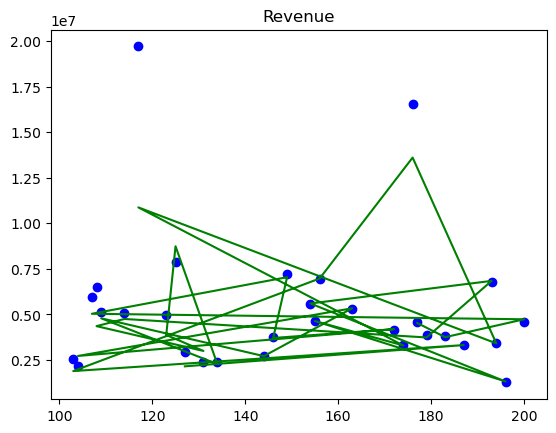

In [79]:
plt.scatter(X_test['Id'],Y_test, color='blue')
plt.plot(X_test['Id'],pred, color='green')
plt.title('Revenue')

Text(0.5, 1.0, 'Revenue')

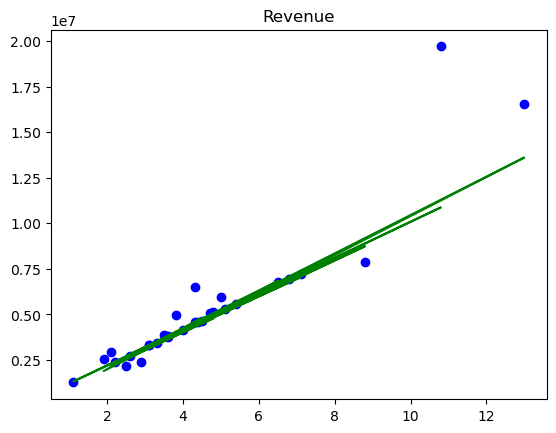

In [82]:
plt.scatter(X_test['Order_Placed'],Y_test, color='blue')
plt.plot(X_test['Order_Placed'],pred, color='green')         #green prediction    blue actual data
plt.title('Revenue')

In [83]:
from sklearn.metrics import r2_score

In [84]:
score = r2_score(pred,Y_test)

In [85]:
score

0.5248108695870968

In [76]:
df.head(1)

,Id,No_Of_Item,Order_Placed,Revenue
0,101,55,5.5,5953753


In [86]:
df1 = df.drop(columns=['Id','No_Of_Item'], axis= 1)

In [87]:
df1

,Order_Placed,Revenue
0,5.5,5953753
1,6.8,7223131
2,1.9,2555379
3,2.5,2175511
4,4.2,4816715
...,...,...
95,1.1,1270499
96,6.3,6412623
97,6.2,6694797
98,2.1,2344689


In [88]:
X = df1[['Order_Placed']]
Y = df1['Revenue']

In [89]:
X

,Order_Placed
0,5.5
1,6.8
2,1.9
3,2.5
4,4.2
...,...
95,1.1
96,6.3
97,6.2
98,2.1


In [90]:
Y

0     5953753
1     7223131
2     2555379
3     2175511
4     4816715
       ...   
95    1270499
96    6412623
97    6694797
98    2344689
99    4567678
Name: Revenue, Length: 100, dtype: int64

In [91]:
X_train,X_test,Y_train,Y_test = train_test_split(X,Y, test_size=.2, random_state=0)

In [92]:
reg1=LinearRegression()

In [93]:
reg1.fit(X_train,Y_train)

LinearRegression()

In [94]:
pred2 = reg1.predict(X_test)

In [95]:
pred2

array([ 2234703.52954005,  3244126.98535113,  2032818.83837783,
        6978993.77185214, 13237419.19788087,  3446011.67651335,
       11016687.59509648,  3244126.98535113,  4657319.82348665,
        1225280.07372896,  5565800.93371663,  6676166.73510882,
        3647896.36767557,  4859204.51464887,  4455435.13232443,
        3042242.29418892,  3950723.40441889,  8997840.68347432,
        2335645.87512116,  4960146.86022998])

In [96]:
score1=r2_score(pred2,Y_test)

In [97]:
score1
         

0.479307972065496

In [98]:
#less accuracy due to less data try other method or use feature scaling